In [1]:
# apply autoencoder on mnist dataset

In [2]:
from keras import layers
from keras.datasets import mnist
import keras

In [3]:
#Latent Representation
encoding_dim=32

In [4]:
input_img=keras.Input(shape=(784,))

In [5]:
encoded = layers.Dense(encoding_dim,activation='relu')(input_img)

In [6]:
decoded = layers.Dense(784,activation='sigmoid')(encoded)

In [7]:
autoencoder = keras.Model(input_img,decoded)

In [8]:
encoder = keras.Model(input_img,encoded)
encoder_input = keras.Input(shape=(encoding_dim,))

In [9]:
decoder_layer = autoencoder.layers[-1]

In [10]:
decoder = keras.Model(encoder_input,decoder_layer(encoder_input))

In [11]:
autoencoder.compile(optimizer = 'adam',loss = 'binary_crossentropy')

In [12]:
(xtrain,_),(xtest,_)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
xtrain = xtrain.astype("float32")/255

In [14]:
xtest = xtest.astype('float32')/255

In [15]:
xtrain.shape

(60000, 28, 28)

In [16]:
xtest.shape

(10000, 28, 28)

In [17]:
import numpy as np

In [18]:
xtrain = xtrain.reshape((len(xtrain),np.prod(xtrain.shape[1:])))

In [19]:
xtrain.shape

(60000, 784)

In [20]:
xtest = xtest.reshape((len(xtest),np.prod(xtest.shape[1:])))

In [21]:
xtest.shape

(10000, 784)

In [22]:
autoencoder.fit(xtrain,xtrain,epochs=50,batch_size=256,validation_data=(xtest,xtest))

Epoch 1/50
235/235 [==============================] - 6s 22ms/step - loss: 0.2776 - val_loss: 0.1913
Epoch 2/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1711 - val_loss: 0.1535
Epoch 3/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1442 - val_loss: 0.1338
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1288 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 6s 25ms/step - loss: 0.1190 - val_loss: 0.1136
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1118 - val_loss: 0.1073
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1064 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1025 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0997 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0978 - val_lo

In [23]:
encoded_imgs=encoder.predict(xtest)

313/313 [==============================] - 0s 1ms/step


In [24]:
decoded_imgs=decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


In [25]:
import matplotlib.pyplot as plt

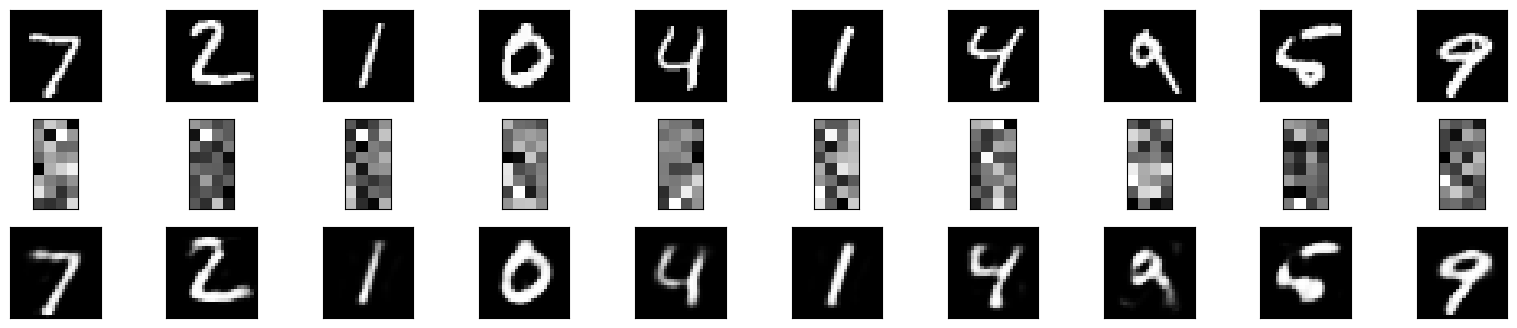

In [27]:
n=10
plt.figure(figsize=(40,4))
for i in range(10):
  ax=plt.subplot(3,20,i+1)
  plt.imshow(xtest[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(3,20,i+1+20)
  plt.imshow(encoded_imgs[i].reshape(8,4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(3,20,2*20+i+1)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)